## Speech Recognition Using Speech Command Dataset

Importing all the necessary libraries for speech recognition using tensorflow.

In [1]:
"""
Uncomment the lines below in case the following libraries are not installed

!pip install seaborn
!pip install tensorflow
!pip install librosa


"""

import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display as ipd

from scipy.io import wavfile # For audio processing
from scipy import signal
import librosa
from librosa import display
from random import choice

In [2]:
# Set seed for experiment reproducibility
seed = 27
tf.random.set_seed(seed)
np.random.seed(seed)

In [1]:
!pip install py7zr

In [4]:
# Import py7zr library to extract the data from the zipped files
import py7zr
with py7zr.SevenZipFile("train.7z", 'r') as archive:
    archive.extractall(path="./train")
with py7zr.SevenZipFile("train.7z", 'r') as archive:
    archive.extractall(path="./test")

In [3]:
# Get the location of the present working directory 
os.getcwd()

'F:\\KARTIK\\2021\\MIDAS Lab IIITD\\Selection Round\\Task-1'

In [4]:
# Selecting a random audio clip from the 'zero' folder and analyzing it using librosa
training_path = './train/audio'
file_name = choice(os.listdir('./train/audio/zero'))

### Using Librosa Package for Audio Analysis

We will use librosa (Version: 0.8.0) for audio analysis. Librosa provides the necessary blocks for building systems for music analysis and retreival systems.


In [5]:
# Loading an audio clip from the 'zero' folder and analyzing it
samples, sample_rate = librosa.load(str(training_path)+'/zero/' +file_name)

In [6]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

The below commented out code was used as reference to create the plot between amplitude and time for sound waves.


In [9]:
# freqs, times, spectrogram = log_specgram(samples, sample_rate)

# fig = plt.figure(figsize=(14, 8))
# ax1 = fig.add_subplot(211)
# ax1.set_title('Raw wave of ' + file_name)
# ax1.set_ylabel('Amplitude')
# ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

# The below commented out code was used as reference 

# ax2 = fig.add_subplot(212)
# ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
#            extent=[times.min(), times.max(), freqs.min(), freqs.max()])
# ax2.set_yticks(freqs[::16])
# ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + file_name)
# ax2.set_ylabel('Freqs in Hz')
# ax2.set_xlabel('Seconds')

In [7]:
def plot_waveform(samples, sample_rate, file_name):
    plt.figure(figsize=(14, 8))
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Waveform of  " + str('/zero/' +file_name))
    librosa.display.waveplot(samples, sr = sample_rate)

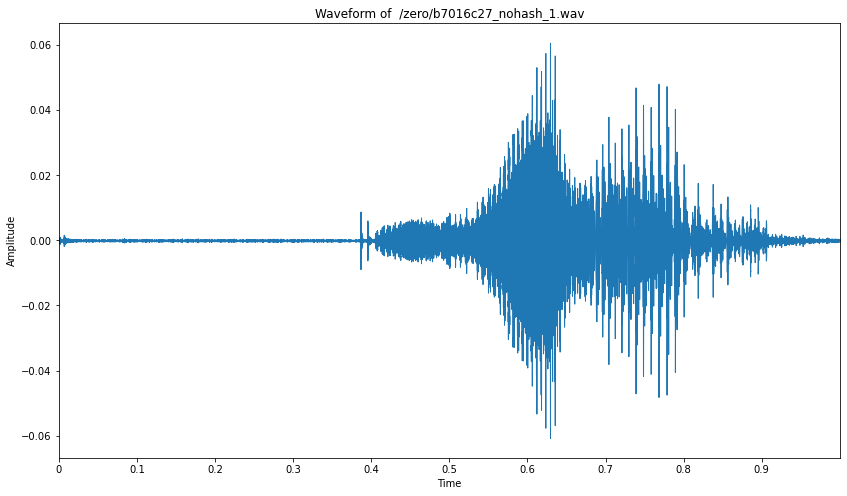

In [8]:
plot_waveform(samples, sample_rate, file_name)

### Power Spectrum of the Audio Wave

The spectrum is symmterical so we will display only one half of it since all the information can be accessed through it.

In [9]:
def power_spectrum(samples,name):
    fft = np.fft.fft(samples)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(frequency)/2)]
    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title(name, fontsize = 15)
    plt.show()

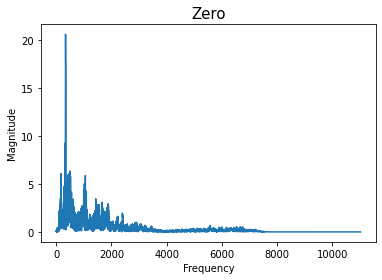

In [10]:
power_spectrum(samples,'Zero')

### Short Time Fourier Transform
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

In [11]:
def stft(samples, name):
    n_fft = 2048    # Window we are considering when performing a single fourier transform
    hop_length = 512 # Amount we are shifting each fft to the right 
    # stft -> short time fourier transform
    stft = librosa.core.stft(samples, hop_length = hop_length, n_fft = n_fft)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr = sample_rate, hop_length = hop_length)
    plt.xlabel("Time", fontsize = 13)
    plt.ylabel("Frequency", fontsize = 13)
    plt.title(name, fontsize = 15)
    plt.colorbar()
    plt.show()

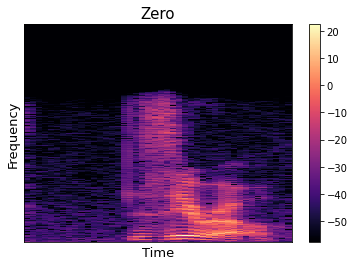

In [12]:
stft(samples, 'Zero')

Reconstructing the audio signal using librosa

In [13]:
samples=np.array(samples, dtype='float64')
reconstruction_audio = librosa.resample(samples, sample_rate, 9000)
ipd.Audio(reconstruction_audio, rate = 9000)

In [14]:
# Plotting the total no. of recordings in the entire dataset using a bar graph
labels = os.listdir(training_path)

def total_sounds(labels, training_path):
    X = []
    for category in labels:
        path = os.path.join(training_path, category)
        X.append(len(os.listdir(path)))
    plt.figure(figsize=(30,10))
    index = np.arange(len(labels))
    plt.bar(labels, X, edgecolor = 'black')
    plt.xlabel('Commands', fontsize=30)
    plt.ylabel('No of recordings', fontsize=30)
    plt.xticks(index, labels, fontsize=20, rotation=90)
    plt.yticks(fontsize = 20)
    plt.title('No. of recordings for each command', fontsize = 30)
    plt.show()
    
        

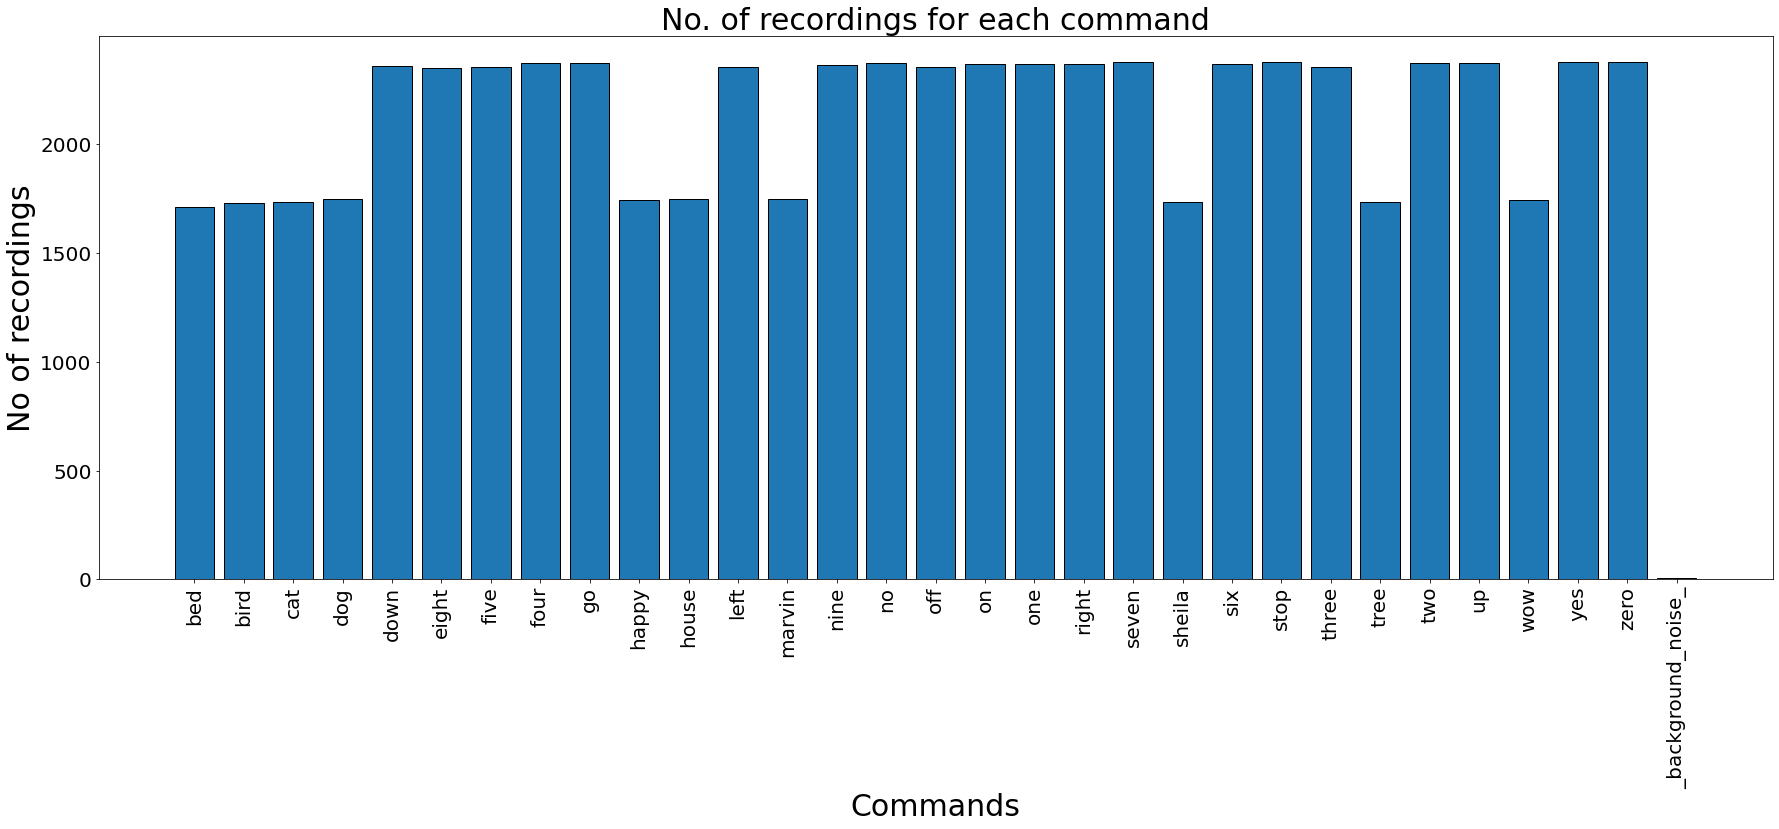

In [15]:
total_sounds(labels, training_path)

In [16]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

Selecting any random audio file from the labels and displaying the frequency-amplitude plot for each of the sound waves.

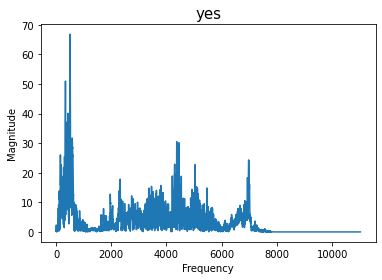

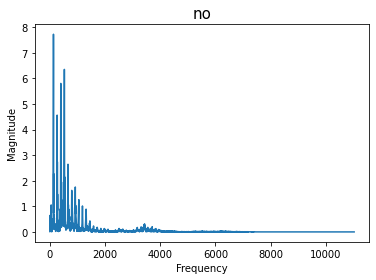

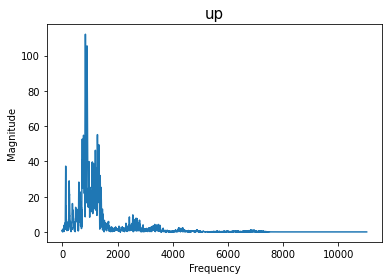

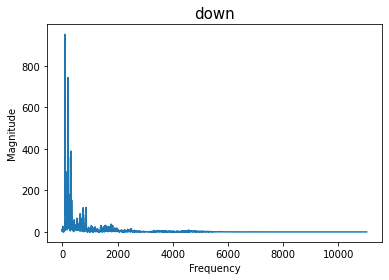

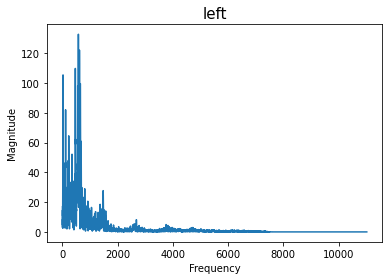

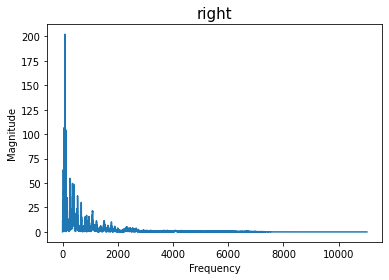

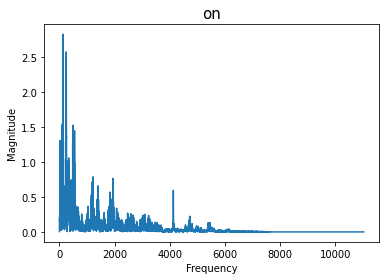

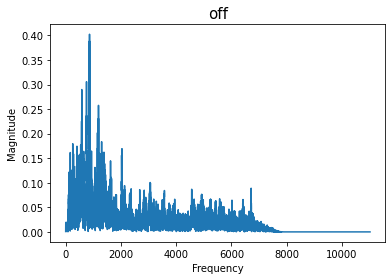

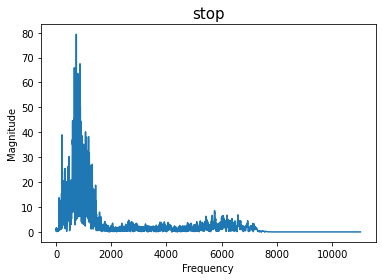

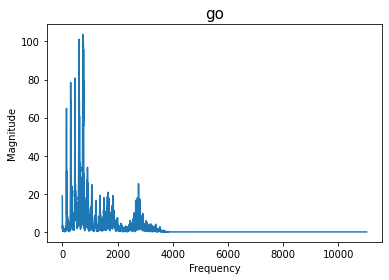

In [17]:
for folder in labels:
    final_path = os.path.join(training_path, folder)
    #print(choice(os.listdir(final_path)))
    file_name = choice(os.listdir(final_path))
    samples, sample_rate = librosa.load(os.path.join(final_path,file_name))
    power_spectrum(samples, folder)

Selecting any random audio file from the labels and displaying the frequency-time (calculating the short time fourier transform for each wave plot for each of the sound waves).

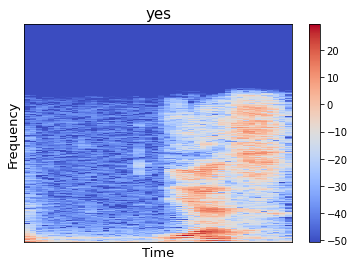

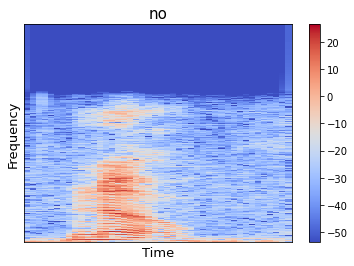

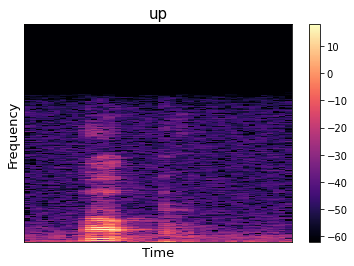

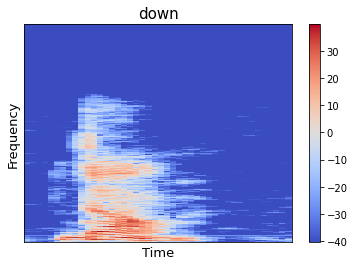

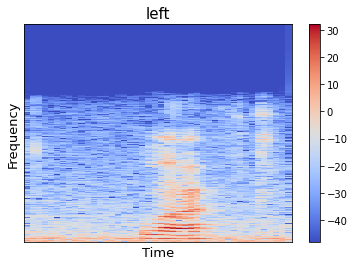

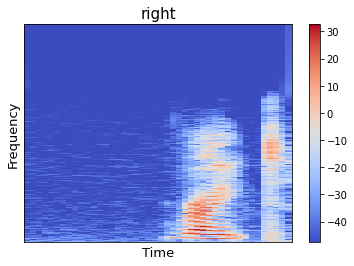

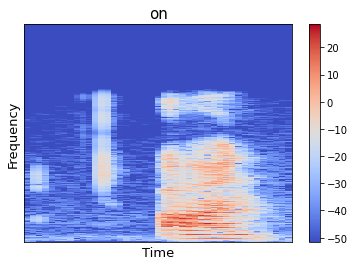

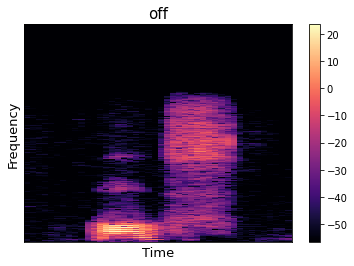

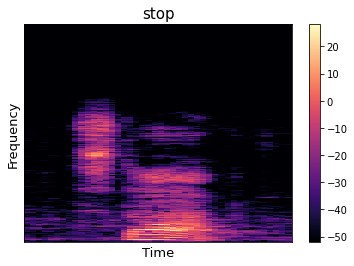

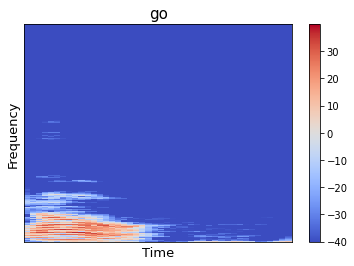

In [18]:
for folder in labels:
    final_path = os.path.join(training_path, folder)
    #print(choice(os.listdir(final_path)))
    file_name = choice(os.listdir(final_path))
    samples, sample_rate = librosa.load(os.path.join(final_path,file_name))
    stft(samples, folder)

In [20]:
# Getting the audio signals appended into lists

#labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(training_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(training_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [ ]:
len(all_label)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
print(y.ndim)
classes= list(le.classes_)
classes

1


['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [28]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave)
print(y.ndim)

2


In [29]:
print(all_wave.ndim)
y.ndim

2


2

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test set labels

X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(all_wave),
    np.array(y),
    stratify=y,
    test_size = 0.2,
    random_state=777,
    shuffle = True)

In [31]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

# Creating our CNN Model to detect audio samples

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.2)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.2)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [38]:
history=model.fit(X_train, Y_train ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/100
533/533 [==============================] - 45s 84ms/step - loss: 2.2979 - accuracy: 0.1120 - val_loss: 2.2881 - val_accuracy: 0.1450

Epoch 00001: val_accuracy improved from -inf to 0.14497, saving model to best_model.hdf5
Epoch 2/100
533/533 [==============================] - 46s 87ms/step - loss: 2.2824 - accuracy: 0.1318 - val_loss: 2.2718 - val_accuracy: 0.1541

Epoch 00002: val_accuracy improved from 0.14497 to 0.15412, saving model to best_model.hdf5
Epoch 3/100
533/533 [==============================] - 50s 93ms/step - loss: 2.2690 - accuracy: 0.1464 - val_loss: 2.2444 - val_accuracy: 0.1863

Epoch 00003: val_accuracy improved from 0.15412 to 0.18625, saving model to best_model.hdf5
Epoch 4/100
533/533 [==============================] - 45s 85ms/step - loss: 2.2429 - accuracy: 0.1648 - val_loss: 2.1962 - val_accuracy: 0.1985

Epoch 00004: val_accuracy improved from 0.18625 to 0.19845, saving model to best_model.hdf5
Epoch 5/100
533/533 [==============================


Epoch 00036: val_accuracy did not improve from 0.71851
Epoch 37/100
533/533 [==============================] - 46s 87ms/step - loss: 0.8445 - accuracy: 0.7049 - val_loss: 0.8850 - val_accuracy: 0.7002

Epoch 00037: val_accuracy did not improve from 0.71851
Epoch 38/100
533/533 [==============================] - 46s 86ms/step - loss: 0.8091 - accuracy: 0.7101 - val_loss: 0.8466 - val_accuracy: 0.7138

Epoch 00038: val_accuracy did not improve from 0.71851
Epoch 39/100
533/533 [==============================] - 46s 87ms/step - loss: 0.8112 - accuracy: 0.7171 - val_loss: 0.8131 - val_accuracy: 0.7202

Epoch 00039: val_accuracy improved from 0.71851 to 0.72015, saving model to best_model.hdf5
Epoch 40/100
533/533 [==============================] - 47s 88ms/step - loss: 0.8012 - accuracy: 0.7166 - val_loss: 0.9690 - val_accuracy: 0.6683

Epoch 00040: val_accuracy did not improve from 0.72015
Epoch 41/100
533/533 [==============================] - 52s 97ms/step - loss: 0.7810 - accuracy: 0.

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17049, 8000)
(17049, 10)
(4263, 8000)
(4263, 10)


In [60]:
def plot_metrics(model_name, metric = 'accuracy'):
    if metric == 'loss':
        plt.title("Loss Values")
        plt.plot(model_name.history['loss'], label = 'train')
        plt.plot(model_name.history['val_loss'], label = 'test')
        plt.legend()
        plt.show()
    else:
        plt.title("Accuracy Values")
        plt.plot(model_name.history['accuracy'], label='train') 
        plt.plot(model_name.history['val_accuracy'], label='test') 
        plt.legend()
        plt.show()

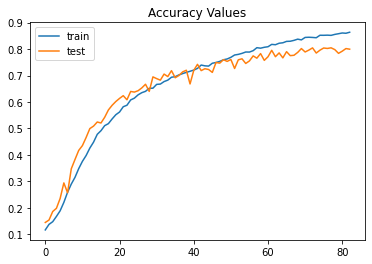

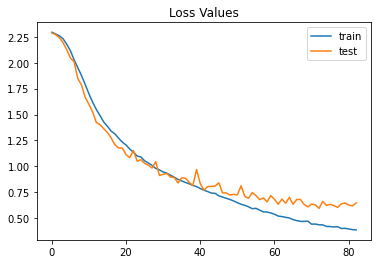

In [61]:
plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

In [39]:
# Saving our model in both formats
model.save('Speech_Classsification_CNN.h5')
model.save('Speech_Classsification_CNN')

INFO:tensorflow:Assets written to: Speech_Classsification_CNN\assets


In [35]:
from keras import Model
from keras.layers import Input, Conv1D, BatchNormalization, Dropout, Dense
from keras.layers import Bidirectional, LSTM, TimeDistributed

X_input = Input(shape=(8000, 1))

X = LSTM(units=36, return_sequences=True)(X_input)
X = LSTM(units=18, return_sequences=False)(X)
X = Dense(len(labels), activation='softmax')(X)
 

model_LSTM = Model(inputs=[X_input], outputs=[X])
model_LSTM.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 8000, 36)          5472      
_________________________________________________________________
lstm_1 (LSTM)                (None, 18)                3960      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                190       
Total params: 9,622
Trainable params: 9,622
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy 
from keras import metrics

model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.010) , metrics = ['accuracy'])

In [37]:
history_2=model_LSTM.fit(X_train, Y_train ,epochs=100, callbacks=[es,mc], batch_size=32)

Epoch 1/100
533/533 [==============================] - 3651s 7s/step - loss: 2.3057 - accuracy: 0.0947
Epoch 2/100
 79/533 [===>..........................] - ETA: 55:10 - loss: 2.3050 - accuracy: 0.1017

KeyboardInterrupt: 